In [ ]:
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt


iris=datasets.load_iris()


We are using iris dataset.

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### We will saperate features data and target values.

In [ ]:
X = iris.data
y = iris.target

X.shape, y.shape

((150, 4), (150,))

Here we are using Elbow method to find optimal number of clusers.
First we will try for saveral number of clusters and create a list of sum of distances from centroid.

And then after plotting graph of that we will decide number of clusters.

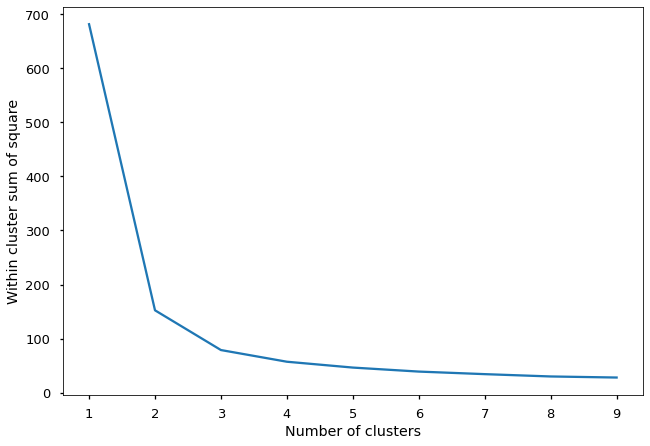

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,10):
    kmCLF = KMeans(n_clusters=i,n_jobs=4, random_state=0)
    kmCLF.fit(X)
    wcss.append(kmCLF.inertia_)

plt.style.use("seaborn-talk")
plt.plot(range(1,10),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of square")
plt.show()

In above graph we can see that at point 3 graph is taking major turn.
Which is optimal cluster number.

So now we will create classifier for 3 clusters and predict.

In [ ]:
kmCLF = KMeans(n_clusters=3,n_jobs=4, random_state=0)
kmCLF.fit(X)

yPred = kmCLF.predict(X)

centers = kmCLF.cluster_centers_

### Sepal length vs Sepal width graph

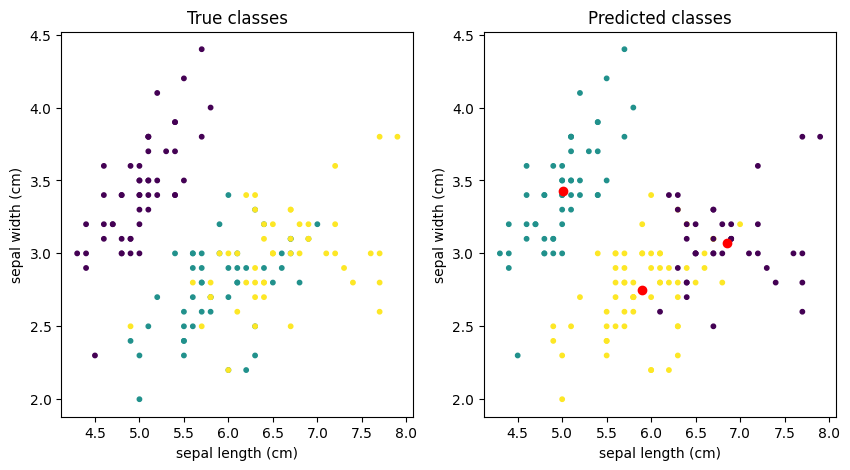

In [ ]:
plt.style.use("default")

plt.subplots(figsize=(10, 5))

plt.subplot(1,2,1)
plt.title("True classes")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"],c=y,s=10)

plt.subplot(1,2,2)
plt.title("Predicted classes")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"],c=yPred,s=10)
plt.scatter(centers[:,0], centers[:,1],c='red')

plt.show()

### Red dots denotes the centroids

### Petal length vs Petal width graph

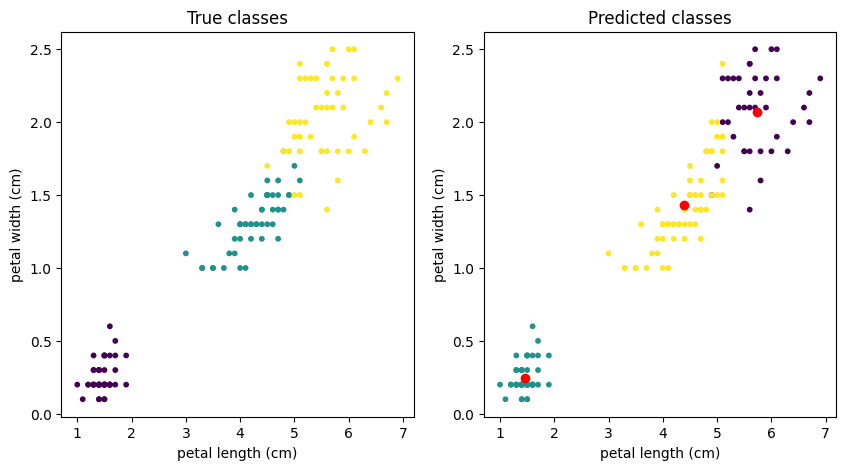

In [ ]:
plt.subplots(figsize=(10, 5))

plt.subplot(1,2,1)
plt.title("True classes")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(df["petal length (cm)"], df["petal width (cm)"],c=y,s=10)

plt.subplot(1,2,2)
plt.title("Predicted classes")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(df["petal length (cm)"], df["petal width (cm)"],c=yPred,s=10)
plt.scatter(centers[:,2], centers[:,3],c='red')

plt.show()

### Since there are 4 features, we will use area(length x width) of Sepal and Petal to visualise in 2D graph.

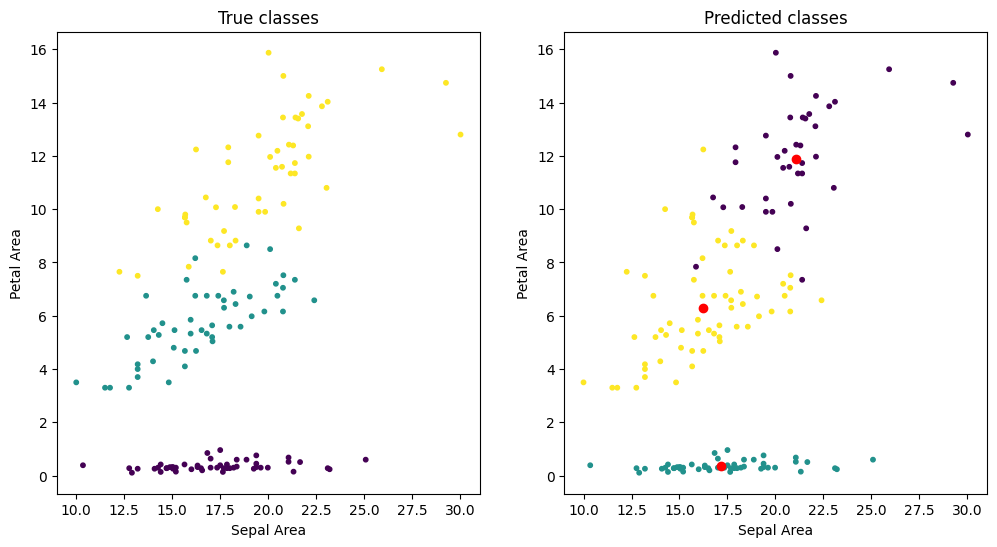

In [ ]:
plt.style.use("default")

plt.subplots(figsize=(12, 6))

plt.subplot(1,2,1)
plt.title("True classes")
plt.xlabel("Sepal Area")
plt.ylabel("Petal Area")
plt.scatter((X[:,0]*X[:,1]),(X[:,2]*X[:,3]),c=y,s=10)


plt.subplot(1,2,2)
plt.title("Predicted classes")
plt.xlabel("Sepal Area")
plt.ylabel("Petal Area")
plt.scatter((X[:,0]*X[:,1]),(X[:,2]*X[:,3]),c=yPred,s=10)
plt.scatter(centers[:,0]*centers[:,1],centers[:,2]*centers[:,3],c='red')

plt.show()